In [1]:
# Logistic regression- it only takes 'int' values
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [2]:
x = df.drop(columns='Outcome')
#print(x)
y = df['Outcome']
#print(y)
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)
ypred = Lr.predict(X_test)
print(ypred)
# the target variable(y) must be categorical i.e. (0,1) , true-false, yes-no
# x can be cageorgical or numerical
#Lr.score(x,y)
from sklearn.metrics import accuracy_score
acc=accuracy_score(ypred,Y_test)
print(acc)

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 1 0 1 1 0 0 0]
0.7447916666666666


In [3]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,ypred)
print(cm)

[[111  13]
 [ 36  32]]


In [4]:
#classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       124
           1       0.71      0.47      0.57        68

    accuracy                           0.74       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.74      0.73       192



In [5]:
# logistic regression on titanic 
df1 = pd.read_csv("train.csv")
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
#df1['Sex']==1 where df1['Sex']='male'
df1['Age'].isnull().sum()
df1['Age'].mean()
df1['Age']=df1.Age.fillna(29)

In [8]:
df1.head()
df1['Age'].isnull().sum()

0

In [9]:
df1['Age'].dtype
df1['Sex'] = df1['Sex'].map({'male':0, 'female':1})

In [10]:
x = df1.drop(columns=['Survived','Ticket','Embarked','Cabin','Name'])
print(x)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0              1       3    0  22.0      1      0   7.2500
1              2       1    1  38.0      1      0  71.2833
2              3       3    1  26.0      0      0   7.9250
3              4       1    1  35.0      1      0  53.1000
4              5       3    0  35.0      0      0   8.0500
..           ...     ...  ...   ...    ...    ...      ...
886          887       2    0  27.0      0      0  13.0000
887          888       1    1  19.0      0      0  30.0000
888          889       3    1  29.0      1      2  23.4500
889          890       1    0  26.0      0      0  30.0000
890          891       3    0  32.0      0      0   7.7500

[891 rows x 7 columns]


In [11]:
x['Fare'] = x['Fare'].astype(int)
x['Age'] = x["Age"].astype(int)
x['Age'].dtype
x['Fare'].dtype

dtype('int32')

In [12]:
print(x)

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare
0              1       3    0   22      1      0     7
1              2       1    1   38      1      0    71
2              3       3    1   26      0      0     7
3              4       1    1   35      1      0    53
4              5       3    0   35      0      0     8
..           ...     ...  ...  ...    ...    ...   ...
886          887       2    0   27      0      0    13
887          888       1    1   19      0      0    30
888          889       3    1   29      1      2    23
889          890       1    0   26      0      0    30
890          891       3    0   32      0      0     7

[891 rows x 7 columns]


In [13]:
y = df1['Survived']
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)
ypred = Lr.predict(X_test)
print(ypred)

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0]


C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ypred,Y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,ypred)

from sklearn.metrics import classification_report
cr = classification_report(Y_test,ypred)

print('Model accuracy: ',acc)
print('Confusion matrix:\n ',cm)
print('Classification report:\n ',cr)

Model accuracy:  0.7937219730941704
Confusion matrix:
  [[122  18]
 [ 28  55]]
Classification report:
                precision    recall  f1-score   support

           0       0.81      0.87      0.84       140
           1       0.75      0.66      0.71        83

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



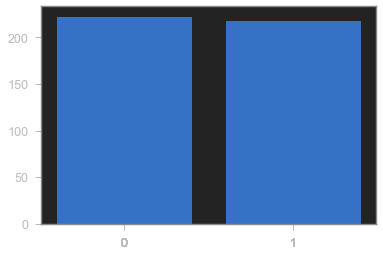

In [15]:
import matplotlib.pyplot as plt
#plt.scatter(X_test,Y_test)
#print(ypred)

plt.bar(ypred,np.arange(len(ypred))) #
plt.xticks(ypred)
plt.show()

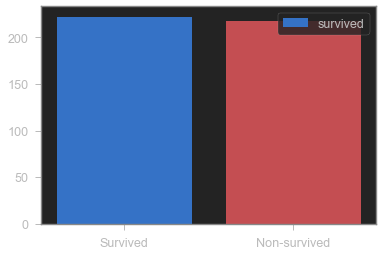

In [19]:
import matplotlib.pyplot as plt
#plt.scatter(X_test,Y_test)
#print(ypred)

bars=plt.bar(ypred,np.arange(len(ypred)),color=['b','r'],label='survived')
plt.legend()
plt.xticks([0,1],['Survived','Non-survived'])
plt.show()

In [57]:
print(ypred.shape)

(223,)


In [ ]:
#how to know no of survived males and females